<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-4-Model-Validation/blob/master/Sammy%20Lee%20-%20LS_DS_242_Validate_classification_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Model Validation_ 

# Validate classification problems

Objectives
- Imbalanced Classes
- Confusion Matrix
- ROC AUC


Reading
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
- [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

## Preliminary

We'll use [mlxtend](http://rasbt.github.io/mlxtend/) and [yellowbrick](http://www.scikit-yb.org/en/latest/) for visualizations. These libraries are already installed on Google Colab. But if you are running locally with Anaconda Python, you'll probably need to install them:

```
conda install -c conda-forge mlxtend 
conda install -c districtdatalabs yellowbrick
```

We'll reuse the `train_validation_test_split` function from yesterday's lesson.

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

## Fun demo!

The next code cell does five things:

#### 1. Generate data

We use scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate fake data for a binary classification problem, based on several parameters, including:
- Number of samples
- Weights, meaning "the proportions of samples assigned to each class."
- Class separation: "Larger values spread out the clusters/classes and make the classification task easier."

(We are generating fake data so it is easy to visualize.)

#### 2. Split data

We split the data three ways, into train, validation, and test sets. (For this toy example, it's not really necessary to do a three-way split. A two-way split, or even no split, would be ok. But I'm trying to demonstrate good habits, even in toy examples, to avoid confusion.)

#### 3. Fit model

We use scikit-learn to fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the training data.

We use this model parameter:

> **class_weight : _dict or ‘balanced’, default: None_**

> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.

> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.


#### 4. Evaluate model

We use our Logistic Regression model, which was fit on the training data, to generate predictions for the validation data.

Then we print [scikit-learn's Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), with many metrics, and also the accuracy score. We are comparing the correct labels to the Logistic Regression's predicted labels, for the validation set. 

#### 5. Visualize decision function

Based on these examples
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-1-decision-regions-in-2d

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.93      0.96      0.94        52

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

accuracy 0.94


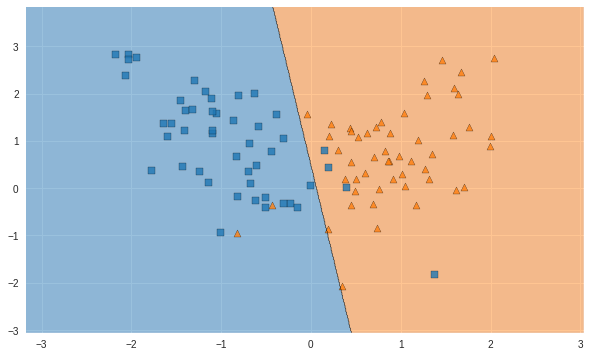

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

Try re-running the cell above with different values for these four parameters:
- `n_samples`
- `weights`
- `class_sep`
- `class_balance`

For example, with a 50% / 50% class distribution:
```
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8
class_balance = None
```

With a 95% / 5% class distribution:
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = None
```

With the same 95% / 5% class distribution, but changing the Logistic Regression's `class_balance` parameter to `'balanced'` (instead of its default `None`)
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = 'balanced'
```

With the same 95% / 5% class distribution, but with different values for `class_balance`:
- `{0: 1, 1: 1}` _(equivalent to `None`)_
- `{1: 1, 1: 2}`
- `{1: 1, 1: 10}` _(roughly equivalent to `'balanced'` for this dataset)_
- `{1: 1, 1: 100}`
- `{1: 1, 1: 10000}`

How do the evaluation metrics and decision region plots change?

## What you can do about imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.


We demonstrated just one of these options: many scikit-learn classifiers have a `class_balance` parameter, which we can use to "adjust the class weight (misclassification costs)."

The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."

You can see how to "adjust the decision threshold" in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

## Bank Marketing — getting started

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

bank-additional-full.csv with all examples (41188) and 20 inputs, **ordered by date (from May 2008 to November 2010)**

### Download data

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2019-01-29 21:26:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   665KB/s    in 0.7s    

2019-01-29 21:26:40 (665 KB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [4]:
!unzip bank-additional.zip

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [5]:
%cd bank-additional

/content/bank-additional


### Load data, assign to X and y

In [0]:
import pandas as pd

bank = pd.read_csv('bank-additional-full.csv', sep=';')

X = bank.drop(columns='y')
y = bank['y'] == 'yes'

### Split data

We want to do "model selection (hyperparameter optimization) and performance estimation" so we'll choose a validation method from the diagram's green box.

There is no one "right" choice here, but I'll choose "3-way holdout method (train/validation/test split)."
  
<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

Source: https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html

There's no one "right" choice here, but I'll choose to split by time, not with a random shuffle, based on this advice by [Rachel Thomas](
https://www.fast.ai/2017/11/13/validation-sets/):
> If your data is a time series, choosing a random subset of the data will be both too easy (you can look at the data both before and after the dates your are trying to predict) and not representative of most business use cases (where you are using historical data to build a model for use in the future).

[According to UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), this data is "ordered by date (from May 2008 to November 2010)" so if I don't shuffle it when splitting, then it will be split by time.

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle=False)

## Bank Marketing — live coding!

### Naive Baseline Model

In [0]:
import numpy as np

majority_class = y_train.mode()[0]
y_pred = np.full(shape=y_val.shape, fill_value=majority_class)

In [9]:
y_val.shape, y_pred.shape

((4119,), (4119,))

In [10]:
y_pred

array([False, False, False, ..., False, False, False])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.842680262199563

In [12]:
y_val.value_counts(normalize=True)    # Doing just this will tell you the majority class

False    0.84268
True     0.15732
Name: y, dtype: float64

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      3471
        True       0.00      0.00      0.00       648

   micro avg       0.84      0.84      0.84      4119
   macro avg       0.42      0.50      0.46      4119
weighted avg       0.71      0.84      0.77      4119



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
# roc_auc_score for majority classifier is always .5

from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.5

In [15]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 2.7MB/s 


In [16]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [17]:
accuracy_score(y_val, y_pred)

0.85360524399126

In [18]:
roc_auc_score(y_val, y_pred)

0.5642172711461101

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)


array([[3424,   47],
       [ 556,   92]])

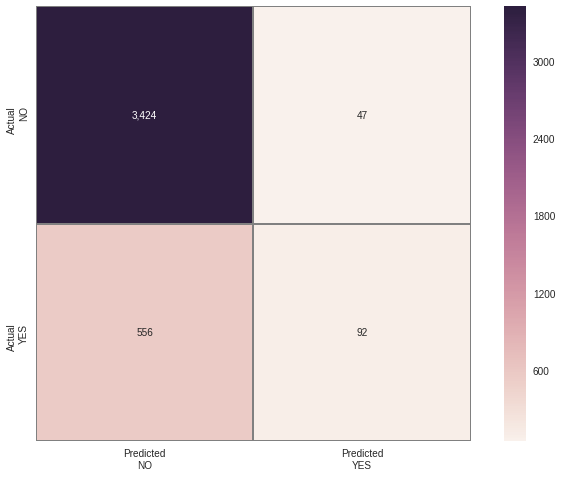

In [20]:
%matplotlib inline
#from matplotlib.colors import ListedColorsMap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

def confusion_viz(y_true, y_pred):
  matrix = confusion_matrix(y_val, y_pred)
  # cmap = ListedColorMap(['white'])
  return sns.heatmap(matrix, cbar=True, annot=True,
                    fmt=',', linewidth=1, linecolor='grey',
                    square=True,
                    xticklabels=['Predicted\nNO', 'Predicted\nYES'],
                    yticklabels=['Actual\nNO', 'Actual\nYES'])

confusion_viz(y_val, y_pred)

# ASSIGNMENT options

Replicate code from the lesson or other examples. [Do it "the hard way" or with the "Benjamin Franklin method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit)

Work with one of these datasets
- [Bank Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- [Synthetic Financial Dataset For Fraud Detection](https://www.kaggle.com/ntnu-testimon/paysim1)
- Any imbalanced binary classification dataset

Continue improving your model. Measure validation performance with a variety of classification metrics, which could include:
- Accuracy
- Precision
- Recall
- F1
- ROC AUC

Try one of the other options mentioned for imbalanced classes
- The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."
- You can see how to "adjust the decision threshold" in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

### Working on Bank Data

In [21]:
import pandas as pd

df = pd.read_csv('bank-additional-full.csv', sep=';')

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.shape

(41188, 21)

In [25]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### The Baseline models above had Accuracy Score of ~85% and ROC_AUC_SCORE of around 56%, and so those are what I'm trying to beat

In [26]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [27]:
import numpy as np

df['y_encoded'] = np.where(df['y'] == 'yes', 1, 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [28]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
y_encoded           int64
dtype: object

In [29]:
df_numeric = df.select_dtypes(include=['number']).copy()
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_encoded
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


###  Baseline Model 2 Using Logistic Regression on just the numerical data

In [30]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Baseline Model #2 Test score: {:.2f}".format(lr.score(X_test, y_test)))

Baseline Model #2 Test score: 0.91


In [31]:
# The test score alone does not tell us anything really meaningful, so let's evaluate Baseline Model 2:

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[8917  227]
 [ 685  468]]


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9144
           1       0.67      0.41      0.51      1153

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [33]:
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print("AUC (Area Under the Curve): {:.3f}".format(lr_auc))

AUC (Area Under the Curve): 0.926


The **ROC-AUC** is considered the gold-standard when it comes to evaluating classification models, and it's the area of the curve which shows FPR (False Positive Rate) and on the x-axis, and TPR (True Positive Rate) on the y-axis.  

The ROC Curve shows the tradeoff between TPR and FPR for all different thresholds of the classfier which the classifier uses to make its predictions.  

You want to be as far on the left corner as possible exemplifying **High TPR, and Low FPR**

### Baseline Model 3:

Simply running a LogisticRegression on just the numerical variables seems to have increased accuracy score.  But this one accuracy score doesn't give us vital clues how it might really perform on new test data.  

So I'm going to re-run the Logistic but separating the dataset into a training set, a validation set, and test set with different parameters using a combination of **GridSearchCV with Cross-Validation** where scikit-learn's GridSearchCV will automatically perform Cross Validation for us on just the training set, so we can test the model on new data it hasn't seen before.

We will summarize the performance of this Baseline model with:
1. The best parameters
2. Best Cross-Validation Score
3. And a Test set score that will give us a clue on generalization performance

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


pipe = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Define the parameter grid that we will search over to find the best parameters
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Fitting using GridSearchCV automatically performs cross-validation with different parameter settings
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred_grid = grid.predict(X_test)

print("Baseline Model #3:")
print()
print("Best parameters: {}".format(grid.best_params_))
print()
print("Best cross-validation scores: {:.2f}".format(grid.best_score_))
print()
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Baseline Model #3:

Best parameters: {'logisticregression__C': 10}

Best cross-validation scores: 0.91

Test set score: 0.91


In [35]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_grid)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[8916  228]
 [ 700  453]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9144
           1       0.67      0.39      0.49      1153

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.80      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



###  This makes clear that the best model for Baseline Model #3 performs slightly worse than Baseline Model #2  in terms of Recall on the 'yes's for the bank dataset
 
 ### Let's check out the ROC-AUC:

In [37]:

from sklearn.metrics import roc_auc_score

grid_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])

print("AUC (Area Under the Curve): {:.3f}".format(grid_auc))

AUC (Area Under the Curve): 0.926


### However, when we consider the AUC, Baseline Model #3 that has been scaled, with C paramter equal to 10 (higher C equals higher compelexity therefore more variance in terms of bias-variance tradeoff) we find a slightly better model.

### Baseline Model 4: SVM with unscaled data

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nBaseline Model #4 Test score: {:.2f}".format(svm.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Baseline Model #4 Test score: 0.89


In [39]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[9092   52]
 [1115   38]]


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9144
           1       0.42      0.03      0.06      1153

   micro avg       0.89      0.89      0.89     10297
   macro avg       0.66      0.51      0.50     10297
weighted avg       0.84      0.89      0.84     10297



In [41]:
# Very interesting result from SVM classification report that the SVM is barely correctly classifying the True Positives for the 1
# in dataset

from sklearn.metrics import roc_auc_score

svm_auc = roc_auc_score(y_test, svm.decision_function(X_test))

print("AUC (Area Under the Curve): {:.3f}".format(svm_auc))

AUC (Area Under the Curve): 0.868


In [0]:
# Again, because it predicts the 1('yes') so poorly, this SVM does no better than the naive baseline model which just predicts
# the most frequent class.



### Let's try using GridSearchCV to find a Support Vector Classifier with the best parameters and run Cross-Validation on it to get more reliable estimate of generalization performance:

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


pipe = make_pipeline(
    MinMaxScaler(),
    SVC()
)

# Define the parameter grid that we will search over to find the best parameters
param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Fitting using GridSearchCV automatically performs cross-validation with different parameter settings
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred_grid = grid.predict(X_test)

print("Baseline Model #3:")
print()
print("Best parameters: {}".format(grid.best_params_))
print()
print("Best cross-validation scores: {:.2f}".format(grid.best_score_))
print()
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Baseline Model #3:

Best parameters: {'svc__C': 100, 'svc__gamma': 1}

Best cross-validation scores: 0.91

Test set score: 0.91


### The scaled data did give us better scores for SVC and also with different parameter settings.  Let's evaluate this Model:

In [43]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_grid)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[8967  177]
 [ 769  384]]


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9144
           1       0.68      0.33      0.45      1153

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.80      0.66      0.70     10297
weighted avg       0.89      0.91      0.89     10297



### The Recall Score for this best model went up by a factor of 10!  While still low, this is definitely an improvement.

In [45]:
from sklearn.metrics import roc_auc_score

svm_auc = roc_auc_score(y_test, grid.decision_function(X_test))

print("AUC (Area Under the Curve): {:.3f}".format(svm_auc))

AUC (Area Under the Curve): 0.907


### Again, the ROC-AUC score tells us that this grid-searched fitted model is better, but still a little worse than the LogisticRegression

### Let's try a Baseline Model #5 Using a RandomForestClassifier without scaled data

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nBaseline Model #5 Test score: {:.2f}".format(rf.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Baseline Model #5 Test score: 0.91


### Right off the at, the RandomForestClassifier is performing at the high end of range.  Let's try to change some parameters and evaluate.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_numeric.loc[:, 'age':'nr.employed'].values
y = df_numeric['y_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, min_samples_split=5).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nBaseline Model #5 Test score: {:.2f}".format(rf.score(X_test, y_test)))


Baseline Model #5 Test score: 0.92


In [53]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[8788  356]
 [ 507  646]]


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      9144
           1       0.64      0.56      0.60      1153

   micro avg       0.92      0.92      0.92     10297
   macro avg       0.80      0.76      0.78     10297
weighted avg       0.91      0.92      0.91     10297



In [55]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("AUC (Area Under the Curve): {:.3f}".format(rf_auc))

AUC (Area Under the Curve): 0.942


### The RandomForestClassifier which only uses the numeric data outperforms both SVC and Logistic in terms of the AUC

### Using SMOTE to balance the data


In [56]:
!pip install imbalanced_learn

In [0]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

os_data_X, os_data_y = os.fit_sample(X_train, y_train)

In [68]:


rf = RandomForestClassifier(n_estimators=100, min_samples_split=5).fit(os_data_X, os_data_y)
y_pred_rf = rf.predict(X_test)

print("\nBaseline Model #6 Test score: {:.2f}".format(rf.score(X_test, y_test)))


Baseline Model #6 Test score: 0.91


In [69]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[10308   660]
 [  498   891]]


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10968
           1       0.57      0.64      0.61      1389

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.76      0.79      0.78     12357
weighted avg       0.91      0.91      0.91     12357



In [71]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("AUC (Area Under the Curve): {:.3f}".format(rf_auc))

AUC (Area Under the Curve): 0.939


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler



pipe = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Define the parameter grid that we will search over to find the best parameters
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Fitting using GridSearchCV automatically performs cross-validation with different parameter settings
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(os_data_X, os_data_y)

y_pred_grid = grid.predict(X_test)

print("Baseline Model #3:")
print()
print("Best parameters: {}".format(grid.best_params_))
print()
print("Best cross-validation scores: {:.2f}".format(grid.best_score_))
print()
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Baseline Model #3:

Best parameters: {'logisticregression__C': 10}

Best cross-validation scores: 0.85

Test set score: 0.85


In [73]:
from sklearn.metrics import roc_auc_score

grid_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])

print("AUC (Area Under the Curve): {:.3f}".format(grid_auc))

AUC (Area Under the Curve): 0.928


### Using SMOTE did slightly worse for RandomForestClassifier and slightly better for the LogisticRegression GridSearchCV model with respect to ROC-AUC score.

In [77]:
# y_train has been balanced half and half

os_data_y_s = pd.Series(os_data_y)
os_data_y_s.value_counts()

1    25580
0    25580
dtype: int64